# matplotlib 応用 - OOP スタイル  

OOP - Object Oriented Programming (オブジェクト指向プログラミング スタイル)  

- [matplotlibのめっちゃまとめ - Qiita](https://qiita.com/nkay/items/d1eb91e33b9d6469ef51)  
- [Gallery](https://matplotlib.org/gallery/index.html)  

## 少し整理  

なんとなくのイメージ (おかしいところはご指摘ください...)  

```
matplotlib                                                     ┌─ plot()
 │                                                             ├─ scatter()
 ├─ pyplot (plt) ─────── "Matlab style" ───────┐               ├─ hist()
 │     │                                       ├─ "plottting" ─┼─ bar(), barh()
 │   "OOP style"                               │               ├─ pie()
 │     │                                       │               ├─ boxplot()
 │     └ Figure ┬ Figure.add_subplot() ┐       │               ├─ …
 ├─ …      │    ├ Figure.subplots() ───┼ Axes ─┤                                         ┌─ text()
           │    └ Figure.add_axes() ───┘   .   ├─ "annotation" ──────────────────────────┼─ annotate()
           │                               .   │                      ┌─ legend()        └─ arrow()
           ├── Figure.add_gridspec() . . . .   └─ "setting for plot" ─┼─ grid()
           │                                                          ├─ title()/set_title()
           └────── "prametor or method" ──────────────────────────────┼─ facecolor()/set_facecolor()                                                                       
                                                                      ├─ xlim()/set_xlim(), ylim()/set_ylim()
                                                                      ├─ xscale()/set_xscale(), yscale()/set_yscale()
                                                                      ├─ xlabel()/set_xlabel(), ylabel()/set_ylabel()
                                                                      ├─ …        
```

### Matlab Style  

- `pyplot` (`plt`) に直接図をプロット  
  最もシンプル。手っ取り早く単一の図をプロットするのに向いている。  

### OOP Style  

`pyplot.figure()` → `Figure` のメソッドで `Axes` を作って図をプロット  

- `Figure.add_subplot()`  
  `GridSpec` と組み合わせて柔軟な大きさ/配置の設定が可能。  
  
- `Figure.subplots()`  
  大きさの同じ複数の図を並べてプロットする場合に便利。  
  
- `Figure.add_axes()`  
  単体で最も自由度が高い。  

In [411]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## plt.figure()

[matplotlib.pyplot.figure](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure)

新しい Figure を作成します。  

- `figsize`: Figure のサイズ (横, 縦) 。単位はインチ。デフォルトは `(6.4, 4.8)`。  
- `dpi`: Figure の解像度 (dots per inch) 。デフォルトは `100.0`。  
- `facecolor`: Figure の背景色。デフォルトは `"white"`。  
- `edgecolor`: Figure の枠の色。デフォルトは `"white"`。  
- `linewidth`: Figure の枠の幅。  
- `tight_layout`: イイ感じに調整してくれる？デフォルトは `"False"`。  

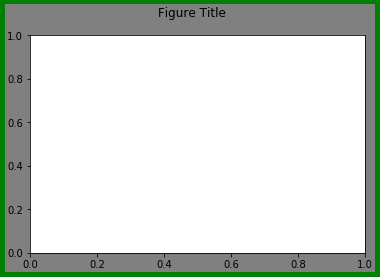

In [412]:
fig = plt.figure(facecolor="gray", linewidth=10, edgecolor="green")

fig.suptitle("Figure Title")  # Figure 全体のタイトル

ax = fig.add_subplot(1, 1, 1)
plt.show()

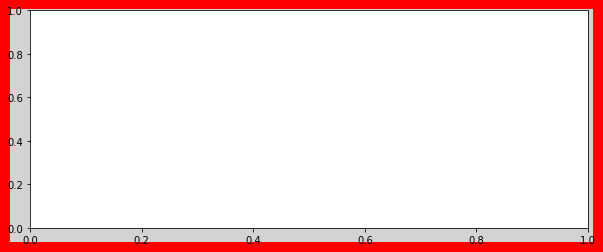

In [413]:
fig = plt.figure(figsize=(10, 4), facecolor="lightgray", linewidth=20, 
                 edgecolor="red")

ax = fig.add_subplot(1, 1, 1)
plt.show()

## Figure.add_subplot()  

[matplotlib.figure.Figure.add_subplot](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)  

Axes (AxesSubplot) を Figure にひとつずつ追加します。  

- はじめの 3 つの引数 (整数) は、`nrow, ncol, index` は、Figure を `nrow` 行 `ncol` 列に分解したときの `index` 番目 (**先頭 は** `1` **から！**) の位置に Axes を追加することを表している。  
それぞれの引数が 1 桁である場合、`2, 3, 1` → `231` のようにまとめて 3 桁の数値で指定することもできる。  
- `title`: Axes の表題。  
- `facecolor`: Axes のプロットエリアの背景色。  
- `xlabel`/`ylabel`: Axes の x 軸/y 軸のラベル。  
- `xticks`/`yticks`: Axes の x 軸/y 軸の目盛の位置。1 次元の `arraylike` で指定。  
- `xticklabels`/`yticklabels`: Axes の x 軸/y 軸の目盛の値。1 次元の `arraylike` で指定。`xticks`/`yticks` の要素数に合わせる。  
- `xmargin`/`ymargin`: データの最小値/最大値から縦/横軸までの間隔。  
- `alpha`: 透明度。 $0 \leq \alpha \leq 1$  

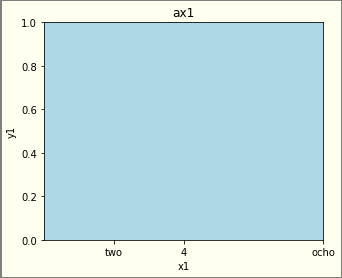

In [414]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray")

ax1 = fig.add_subplot(1, 1, 1, title="ax1", facecolor="lightblue", 
                      xlabel="x1", ylabel="y1", 
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"])
plt.show()

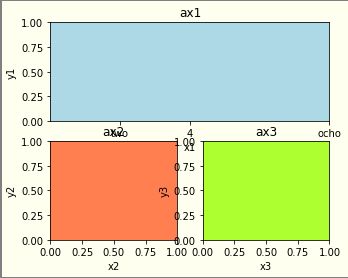

In [415]:
# 3 つの図を並べる
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray")

ax1 = fig.add_subplot(2, 1, 1, title="ax1", facecolor="lightblue", 
                      xlabel="x1", ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"])

ax2 = fig.add_subplot(2, 2, 3, title="ax2", facecolor="coral", 
                      xlabel="x2", ylabel="y2")

ax3 = fig.add_subplot(2, 2, 4, title="ax3", facecolor="greenyellow", 
                      xlabel="x3", ylabel="y3")

plt.show()

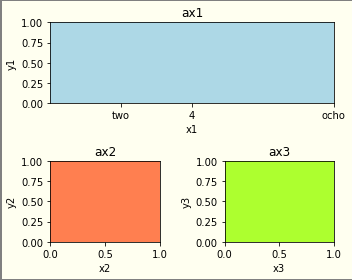

In [416]:
# ラベルの被りを解消するために tight_layout=True にすると…
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

ax1 = fig.add_subplot(2, 1, 1, title="ax1", facecolor="lightblue", 
                      xlabel="x1", ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"])

ax2 = fig.add_subplot(2, 2, 3, title="ax2", facecolor="coral", 
                      xlabel="x2", ylabel="y2")

ax3 = fig.add_subplot(2, 2, 4, title="ax3", facecolor="greenyellow", 
                      xlabel="x3", ylabel="y3")

plt.show()

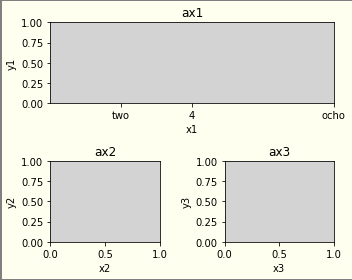

In [417]:
# 共通の設定
common_settings = {"facecolor": "lightgray"}  # 共通の設定を dict に → ※

fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

ax1 = fig.add_subplot(2, 1, 1, title="ax1", xlabel="x1", ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"], 
                      **common_settings)  # ← ※ **でアンパッキングして渡す

ax2 = fig.add_subplot(2, 2, 3, title="ax2", xlabel="x2", ylabel="y2", 
                      **common_settings)  # ← ※

ax3 = fig.add_subplot(2, 2, 4, title="ax3", xlabel="x3", ylabel="y3", 
                      **common_settings)  # ← ※

plt.show()

### Figure.add_gridspec()  

[matplotlib.figure.Figure.add_gridspec](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=figure%20add_gridspec#matplotlib.figure.Figure.add_gridspec)  
[Customizing Figure Layouts Using GridSpec and Other Functions](https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py)  

`Figure` を親とする `GridSpec` を作成します。`GridSpec` によって複雑なレイアウトで `Axes` を配置することができます。  

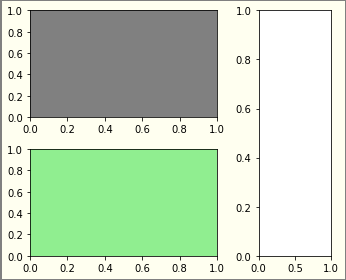

In [453]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

gs = fig.add_gridspec(2, 3)  # Figure の figsize の範囲を 2 行 3 列に分割

ax1 = fig.add_subplot(gs[0, 0:2], facecolor="gray")        # 0 行 の 0-1 列目
ax2 = fig.add_subplot(gs[1, 0:2], facecolor="lightgreen")  # 1 行 の 0-1 列目
ax3 = fig.add_subplot(gs[:, 2])                            # 0-1 行 の 2 列目

plt.show()

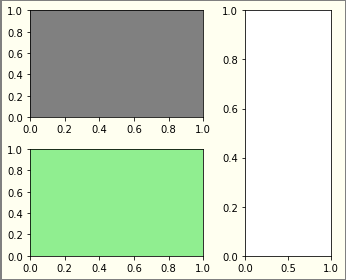

In [475]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

gs = fig.add_gridspec(2, 2,  # Figure の figsize の範囲を 2 行 2 列に分割
                      width_ratios=[2, 1])  # 0 列目と 1列目の幅の比を 2:1 に 

ax1 = fig.add_subplot(gs[0], facecolor="gray")        # 先頭 (gs[0, 0] に同じ)
ax2 = fig.add_subplot(gs[2], facecolor="lightgreen")  # 先頭から 3 番目 (gs[1, 0] に同じ)
ax3 = fig.add_subplot(gs[:, 1])                       # 0-1 行 の 2 列目

plt.show()

## plt.subplots()  



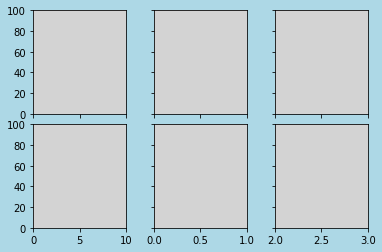

In [420]:
common_settings = {"facecolor": "lightgray"}  # 共通の設定を dict に → ※

# Figure と、 2 行 3 列の計 6 つの Axes (を格納した np.ndarray) を作成
fig, ax = plt.subplots(2, 3, facecolor="lightblue",
                       sharex="col", sharey=True,   # ← ※※
                       subplot_kw=common_settings)  # ← ※

fig.subplots_adjust(wspace=0.3, hspace=0.1)  # Axes 同士の間隔を調整 

ax[0, 0].set_xlim(0, 10)   # 左上の Axes の x 軸の範囲を 0-10 に設定
ax[1, 2].set_xlim(2, 3)    # 右下の Axes の x 軸の範囲を 2-3 に設定
ax[0, 0].set_ylim(0, 100)  # 左上の Axes の y 軸の範囲を 0-100 に設定
                           # ※※ sharex="col" なので x 軸は列ごとに、
                           # sharey=True なので y 軸はすべてに適用される
plt.show()

## Figure.add_axes()  

[matplotlib.figure.Figure](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes)  

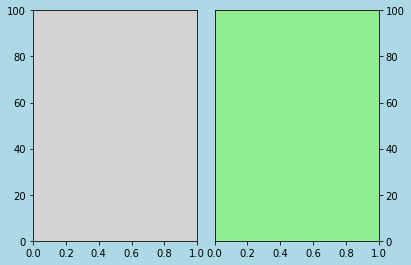

In [477]:
fig = plt.figure(facecolor="lightblue")

# Figure 左下隅を原点に、座標 (0.1, 0.1) から幅 0.38、高さ 0.8 の Axes を作成
ax1 = fig.add_axes((0.1, 0.1, 0.38, 0.8), facecolor="lightgray",
                   ylim=(0, 100))

# 座標 (0.52, 0.1) から幅 0.38、高さ 0.8 の Axes を作成
ax2 = fig.add_axes((0.52, 0.1, 0.38, 0.8), facecolor="lightgreen",
                   sharey=ax1)

ax2.tick_params(left=False, right=True,            # 縦軸目盛を右側に表示
                labelleft=False, labelright=True)  # 縦軸目盛ラベルを右側に表示               

## 練習  

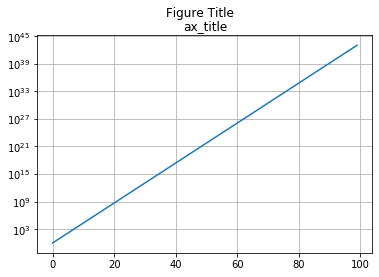

In [410]:
# Figure.add_subplot()
# Axes はひとつ

x = np.arange(100)
y = np.e**x

fig=plt.figure()

fig.suptitle("Figure Title")  # Figure 全体のタイトル

ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y)
ax.set_title("ax_title")
ax.set_yscale("log")  # y対数目盛
ax.grid()

plt.show()

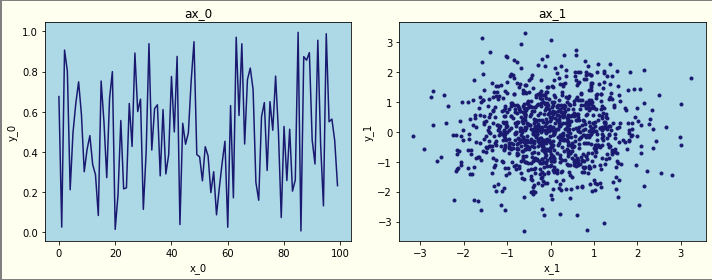

In [421]:
# Figure.add_subplot()
# Axes は複数

x_0 = np.arange(100)
y_0 = np.random.rand(100)
x_1 = np.random.randn(1000)
y_1 = np.random.randn(1000)


fig = plt.figure(figsize=(10, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)


ax_0 = fig.add_subplot(1, 2, 1, title="ax_0", facecolor="lightblue",
                       xlabel="x_0", ylabel="y_0")
ax_0.plot(x_0, y_0, c="midnightblue")


ax_1 = fig.add_subplot(1, 2, 2, title="ax_1", facecolor="lightblue", 
                      xlabel="x_1", ylabel="y_1")
ax_1.scatter(x_1, y_1, c="midnightblue", marker=".")


plt.show()

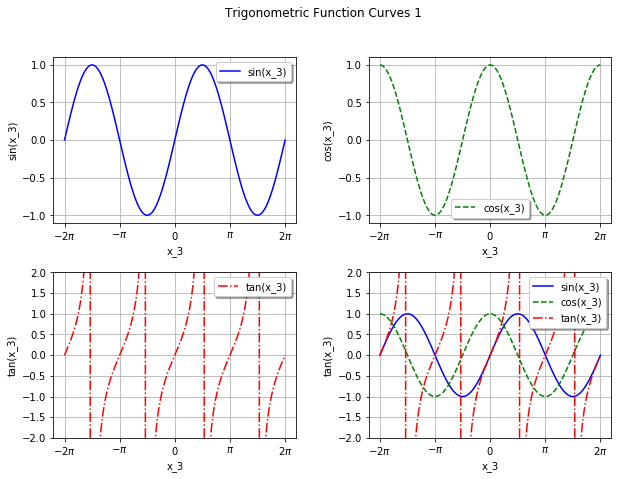

In [437]:
# plt.subplots()

x_3 = np.linspace(-2*np.pi, 2*np.pi, 121)
common_settings = {
    "xlabel": "x_3", 
    "xticks": np.linspace(-2*np.pi, 2*np.pi, 5),
    "xticklabels": ["$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$"]
}

# 2 行 2 列 のレイアウト/共通設定を一括指定
fig, ax = plt.subplots(2, 2, figsize=(10, 7), subplot_kw=common_settings)  

fig.suptitle("Trigonometric Function Curves 1")  # Figure 全体のタイトル
fig.subplots_adjust(wspace=0.3, hspace=0.3)      # 図同士の間隔

y_list = [[np.sin(x_3)], 
          [np.cos(x_3)], 
          [np.tan(x_3)], 
          [np.sin(x_3), np.cos(x_3), np.tan(x_3)]]

y_prop_list = [[{"label": "sin(x_3)", "c": "b", "ls": "-"}], 
               [{"label": "cos(x_3)", "c": "g", "ls": "--"}],
               [{"label": "tan(x_3)", "c": "r", "ls": "-."}],
               [{"label": "sin(x_3)", "c": "b", "ls": "-"}, 
                {"label": "cos(x_3)", "c": "g", "ls": "--"},
                {"label": "tan(x_3)", "c": "r", "ls": "-."}]]

setting_list = [{"ylabel": "sin(x_3)",}, 
                {"ylabel": "cos(x_3)",}, 
                {"ylabel": "tan(x_3)", "ylim": (-2, 2)},
                {"ylabel": "tan(x_3)", "ylim": (-2, 2)}]

for a, y, y_p, s in zip(ax.flatten(), y_list, y_prop_list, setting_list):
    for y_, y_p_ in zip(y, y_p): 
        a.plot(x_3, y_, **y_p_)
    a.set(**s)
    a.legend(shadow=True, framealpha=1, facecolor="w")
    a.grid()
    
# fig.savefig("subplots_0.png")  # 図をファイルに保存
plt.show()

legend() の引数について  

- `bbox_to_anchor=` は、 凡例の枠の図全体に対する相対的な位置を決定します。図全体の左下を `(0, 0)`、 右上を `(1, 1)` としたタプルで与えます。  
- `loc=` は、`bbox_to_anchor` で指定した位置に凡例の枠のどの部分を合わせるかを決定します。`loc="upper left"` でアンカーに枠の左上を合わせます。  
- `borderaxespad=` は、上記のふたつの要素の距離を設定することができます。  
- `shadow=` は、凡例の枠に影を付けます。  
- `framealpha=` は、凡例の背景の透過度を指定します。  
- `facecolor=`" は、凡例の背景色を指定します。  

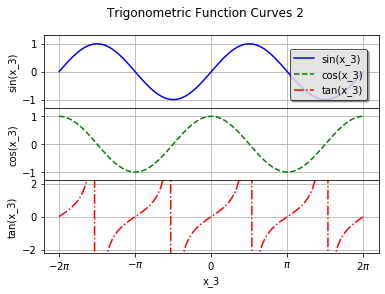

In [488]:
# plt.subplots()
# x 軸の共有

common_settings = {
    "xlabel": "x_3", 
    "xticks": np.linspace(-2*np.pi, 2*np.pi, 5),
    "xticklabels": ["$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$"]
}

# 3 行 (1 列) のレイアウト/sharex=True で x 軸を共有する
fig, ax = plt.subplots(3, sharex=True, subplot_kw=common_settings)  

fig.suptitle("Trigonometric Function Curves 2")  # Figure 全体のタイトル
fig.subplots_adjust(hspace=0.0)                  # 図同士の間隔

y_list = [[np.sin(x_3)], 
          [np.cos(x_3)], 
          [np.tan(x_3)]]

y_prop_list = [[{"label": "sin(x_3)", "c": "b", "ls": "-"}], 
               [{"label": "cos(x_3)", "c": "g", "ls": "--"}],
               [{"label": "tan(x_3)", "c": "r", "ls": "-."}]]

setting_list = [{"ylabel": "sin(x_3)", "ylim": (-1.3, 1.3)}, 
                {"ylabel": "cos(x_3)", "ylim": (-1.3, 1.3)}, 
                {"ylabel": "tan(x_3)", "ylim": (-2.2, 2.2)}]

for a, y, y_p, s in zip(ax.flatten(), y_list, y_prop_list, setting_list):
    for y_, y_p_ in zip(y, y_p): 
        a.plot(x_3, y_, **y_p_)
    a.set(**s)
    a.grid()
    
# Figure に属する Axes の凡例をまとめて表示
fig.legend(bbox_to_anchor=(0.85, 0.85), loc="upper right", 
           borderaxespad=0,                
           shadow=True, framealpha=0.7, facecolor="w", edgecolor="k")  

plt.show()

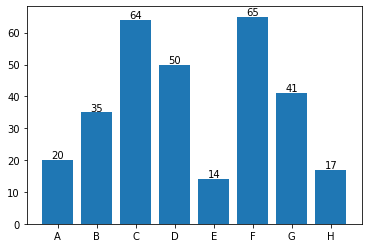

In [424]:
# Figure.add_subplot()
# Axes はひとつ
# Axes.text()

name = ["A", "B", "C", "D", "E", "F", "G", "H"]
age = [  20,  35,  64,  50,  14,  65,  41,  17]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(idx, age)
[ax.text(i, age[i]+0.5, age[i], horizontalalignment="center") 
 for i in range(len(name))]
plt.show()

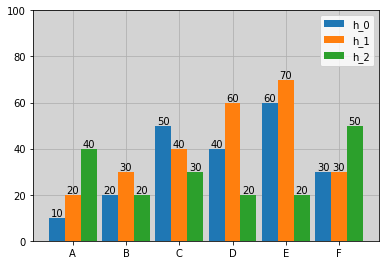

In [486]:
# Figure.add_axes()
# Axes はひとつ
# Axes.text()
# サブ系列を並べた棒グラフ

x_labels =        ["A", "B", "C", "D", "E", "F"]
heights = {"h_0": [ 10,  20,  50,  40,  60,  30],
           "h_1": [ 20,  30,  40,  60,  70,  30], 
           "h_2": [ 40,  20,  30,  20,  20,  50]}

fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), facecolor="lightgray", 
                  xticks=np.arange(len(x_labels)), xticklabels=x_labels,
                  ylim=(0, 100))

num_sub_sys = len(heights)

width = 0.9/num_sub_sys   # 棒の幅
i = -0.5*(num_sub_sys-1)  # サブ系列の位置を決めるための係数の初期値

for h in heights:
    x = np.arange(len(x_labels))+i*width  # プロットするための x 座標
    ax.bar(x, height=heights[h], label=h, width=width, zorder=10)
    
    for x_, h_ in zip(x, heights[h]):
        ax.text(x_, h_+0.5, h_, horizontalalignment="center")
    
    i += 1

ax.legend()
ax.grid(zorder=5)  # zorder が大きいオブジェクトほど前面に表示される

plt.show()

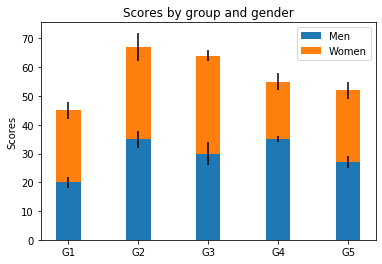

In [426]:
# plt.subplots()
# 積上棒グラフ

labels = [   "G1", "G2", "G3", "G4", "G5"]
men_means = [  20,   35,   30,   35,   27]
women_means = [25,   32,   34,   20,   25]
men_std = [     2,    3,    4,    1,    2]
women_std = [   3,    5,    2,    3,    3]

width = 0.35

fig, ax = plt.subplots()  # subplots() でも単一の Axes を作ることができる

# ax の要素ははひとつしかないので [] でのインデックス指定は不要
# yerr= で誤差の範囲をプロット
# bottom= で下端を指定
ax.bar(labels, men_means, width, yerr=men_std, label="Men")
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label="Women")

ax.set_ylabel("Scores")
ax.set_title("Scores by group and gender")
ax.legend()

plt.show()

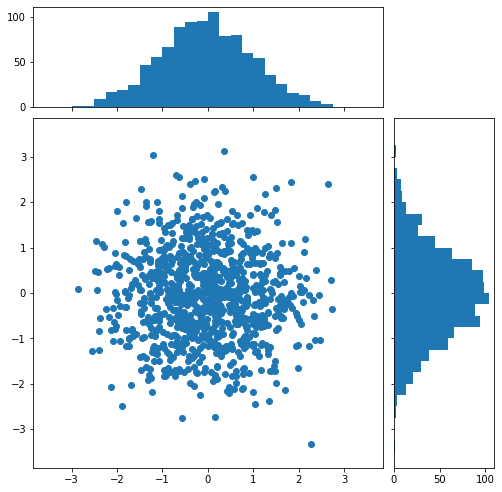

In [427]:
# fig.add_subplot() と fig.gridspec()
# 散布図とヒストグラムの組み合わせ

x = np.random.randn(1000)
y = np.random.randn(1000)

# 描画する関数の定義
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # ヒストグラムはラベルなし
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # 散布図
    ax.scatter(x, y)

    # ヒストグラム
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")


fig = plt.figure(figsize=(8, 8))

gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# 定義した関数で図をプロット
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

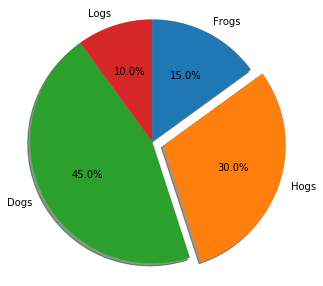

In [428]:
# 円グラフ
labels = "Frogs", "Hogs", "Dogs", "Logs"
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # 2 番目の項目を外側に

fig, ax = plt.subplots(figsize=(5, 5), facecolor="w") 
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
       shadow=True, startangle=90, counterclock=False)

ax.axis("equal")  # x-y のアスペクト比を 1:1 に

plt.show()

In [429]:
# pandas.DataFrame からの描画
# parse_dates=True で、変換可能なデータがあれば datetime に変換する
typing = pd.read_csv(r"./練習用データ/typing.csv", index_col=0, parse_dates=True,
                     encoding="utf-8")
print(typing.index.dtype)

# NaN を前後の値から補完する
# データの先頭行からの NaN はそのまま
typing = typing.interpolate(method="time", axis=0, limit=3)
typing.head(10)

datetime64[ns]


,A_文字数,A_正タイプ率,B_文字数,B_正タイプ率,C_文字数,C_正タイプ率,D_文字数,D_正タイプ率
日付,,,,,,,,
2020-02-03,457.0,89.100000,147.0,82.000000,317.000000,83.700000,NaN,NaN
2020-02-04,472.0,92.600000,191.0,78.000000,382.000000,88.500000,NaN,NaN
2020-02-05,496.0,93.900000,202.0,84.000000,376.000000,82.400000,NaN,NaN
2020-02-06,548.0,94.000000,228.0,83.000000,375.000000,83.100000,590.000000,92.60
2020-02-07,567.0,95.100000,232.0,85.000000,398.000000,82.100000,608.000000,94.80
2020-02-08,579.0,94.766667,240.0,85.033333,397.666667,81.466667,616.666667,94.60
2020-02-09,591.0,94.433333,248.0,85.066667,397.333333,80.833333,625.333333,94.40
2020-02-10,603.0,94.100000,256.0,85.100000,397.000000,80.200000,634.000000,94.20
2020-02-11,614.0,93.300000,260.0,86.050000,413.500000,82.700000,628.000000,94.15


In [441]:
# 文字数と正タイプ率に分割したのち、ラベルを変更する (文字化け回避のため)
typing_nums = typing.iloc[:, 0::2]
typing_nums.index.name = "date"
typing_nums.columns = ["num_A", "num_B", "num_C", "num_D"]

typing_accs = typing.iloc[:, 1::2]
typing_accs.index.name = "date"
typing_accs.columns = ["acc_A", "acc_B", "acc_C", "acc_D"]

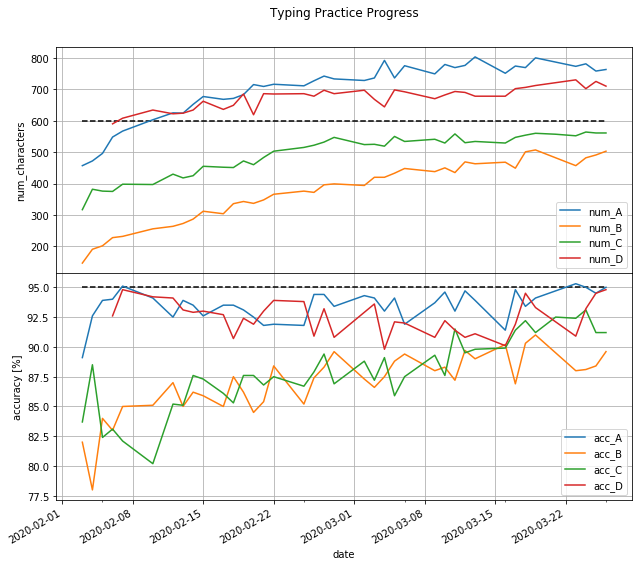

In [431]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Typing Practice Progress")
gs = fig.add_gridspec(2, 1,    # GridSpec の作成
                      left=0.1, right=0.9, bottom=0, top=0.9,
                      hspace=0.0)


ax_0 = fig.add_subplot(gs[0])  # GridSpec に Axes を割り当て
for c_n in typing_nums:
    # DataFrame.plot() による描画  
    # x_compat=True で DataFrame 側での x 軸関連の自動調整を抑制する
    typing_nums[c_n].plot(axes=ax_0, x_compat=True)
    
ax_0.set_ylabel("num_characters")
ax_0.grid()
ax_0.legend()
ax_0.hlines(600, typing_nums.index[0], typing_nums.index[-1], 
            color="k", linestyle="--")


ax_1 = fig.add_subplot(gs[1], sharex=ax_0)  # ax_0 と x 軸を共有する
for c_a in typing_accs:
    typing_accs[c_a].plot(axes=ax_1, x_compat=True)
    
ax_1.set_ylabel("accuracy [%]")
ax_1.grid()
ax_1.legend()
ax_1.hlines(95.0, typing_nums.index[0], typing_nums.index[-1], 
            color="k", linestyle="--")


plt.show()